# Company Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Company_Data.csv")
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
categorical_features = df.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [5]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

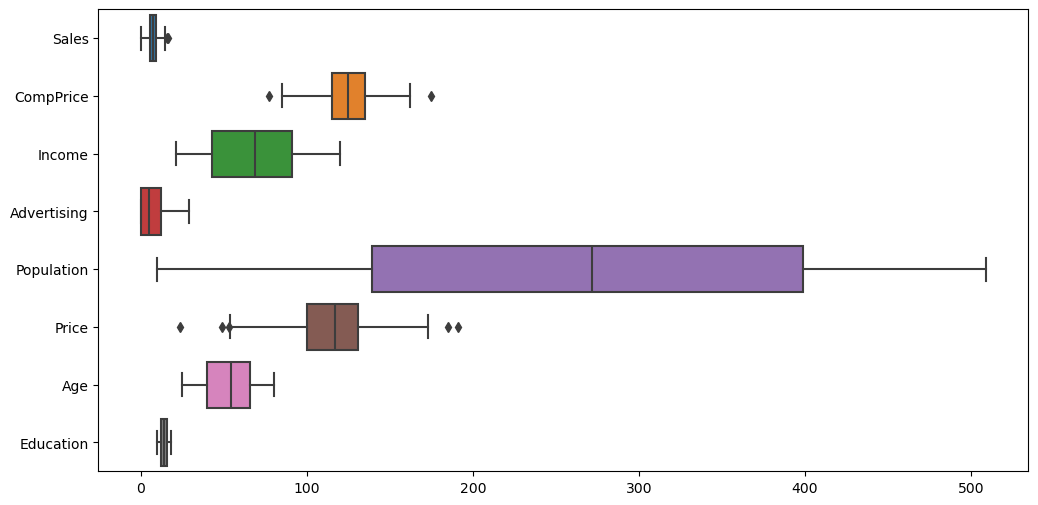

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_features], orient="h")
plt.show()

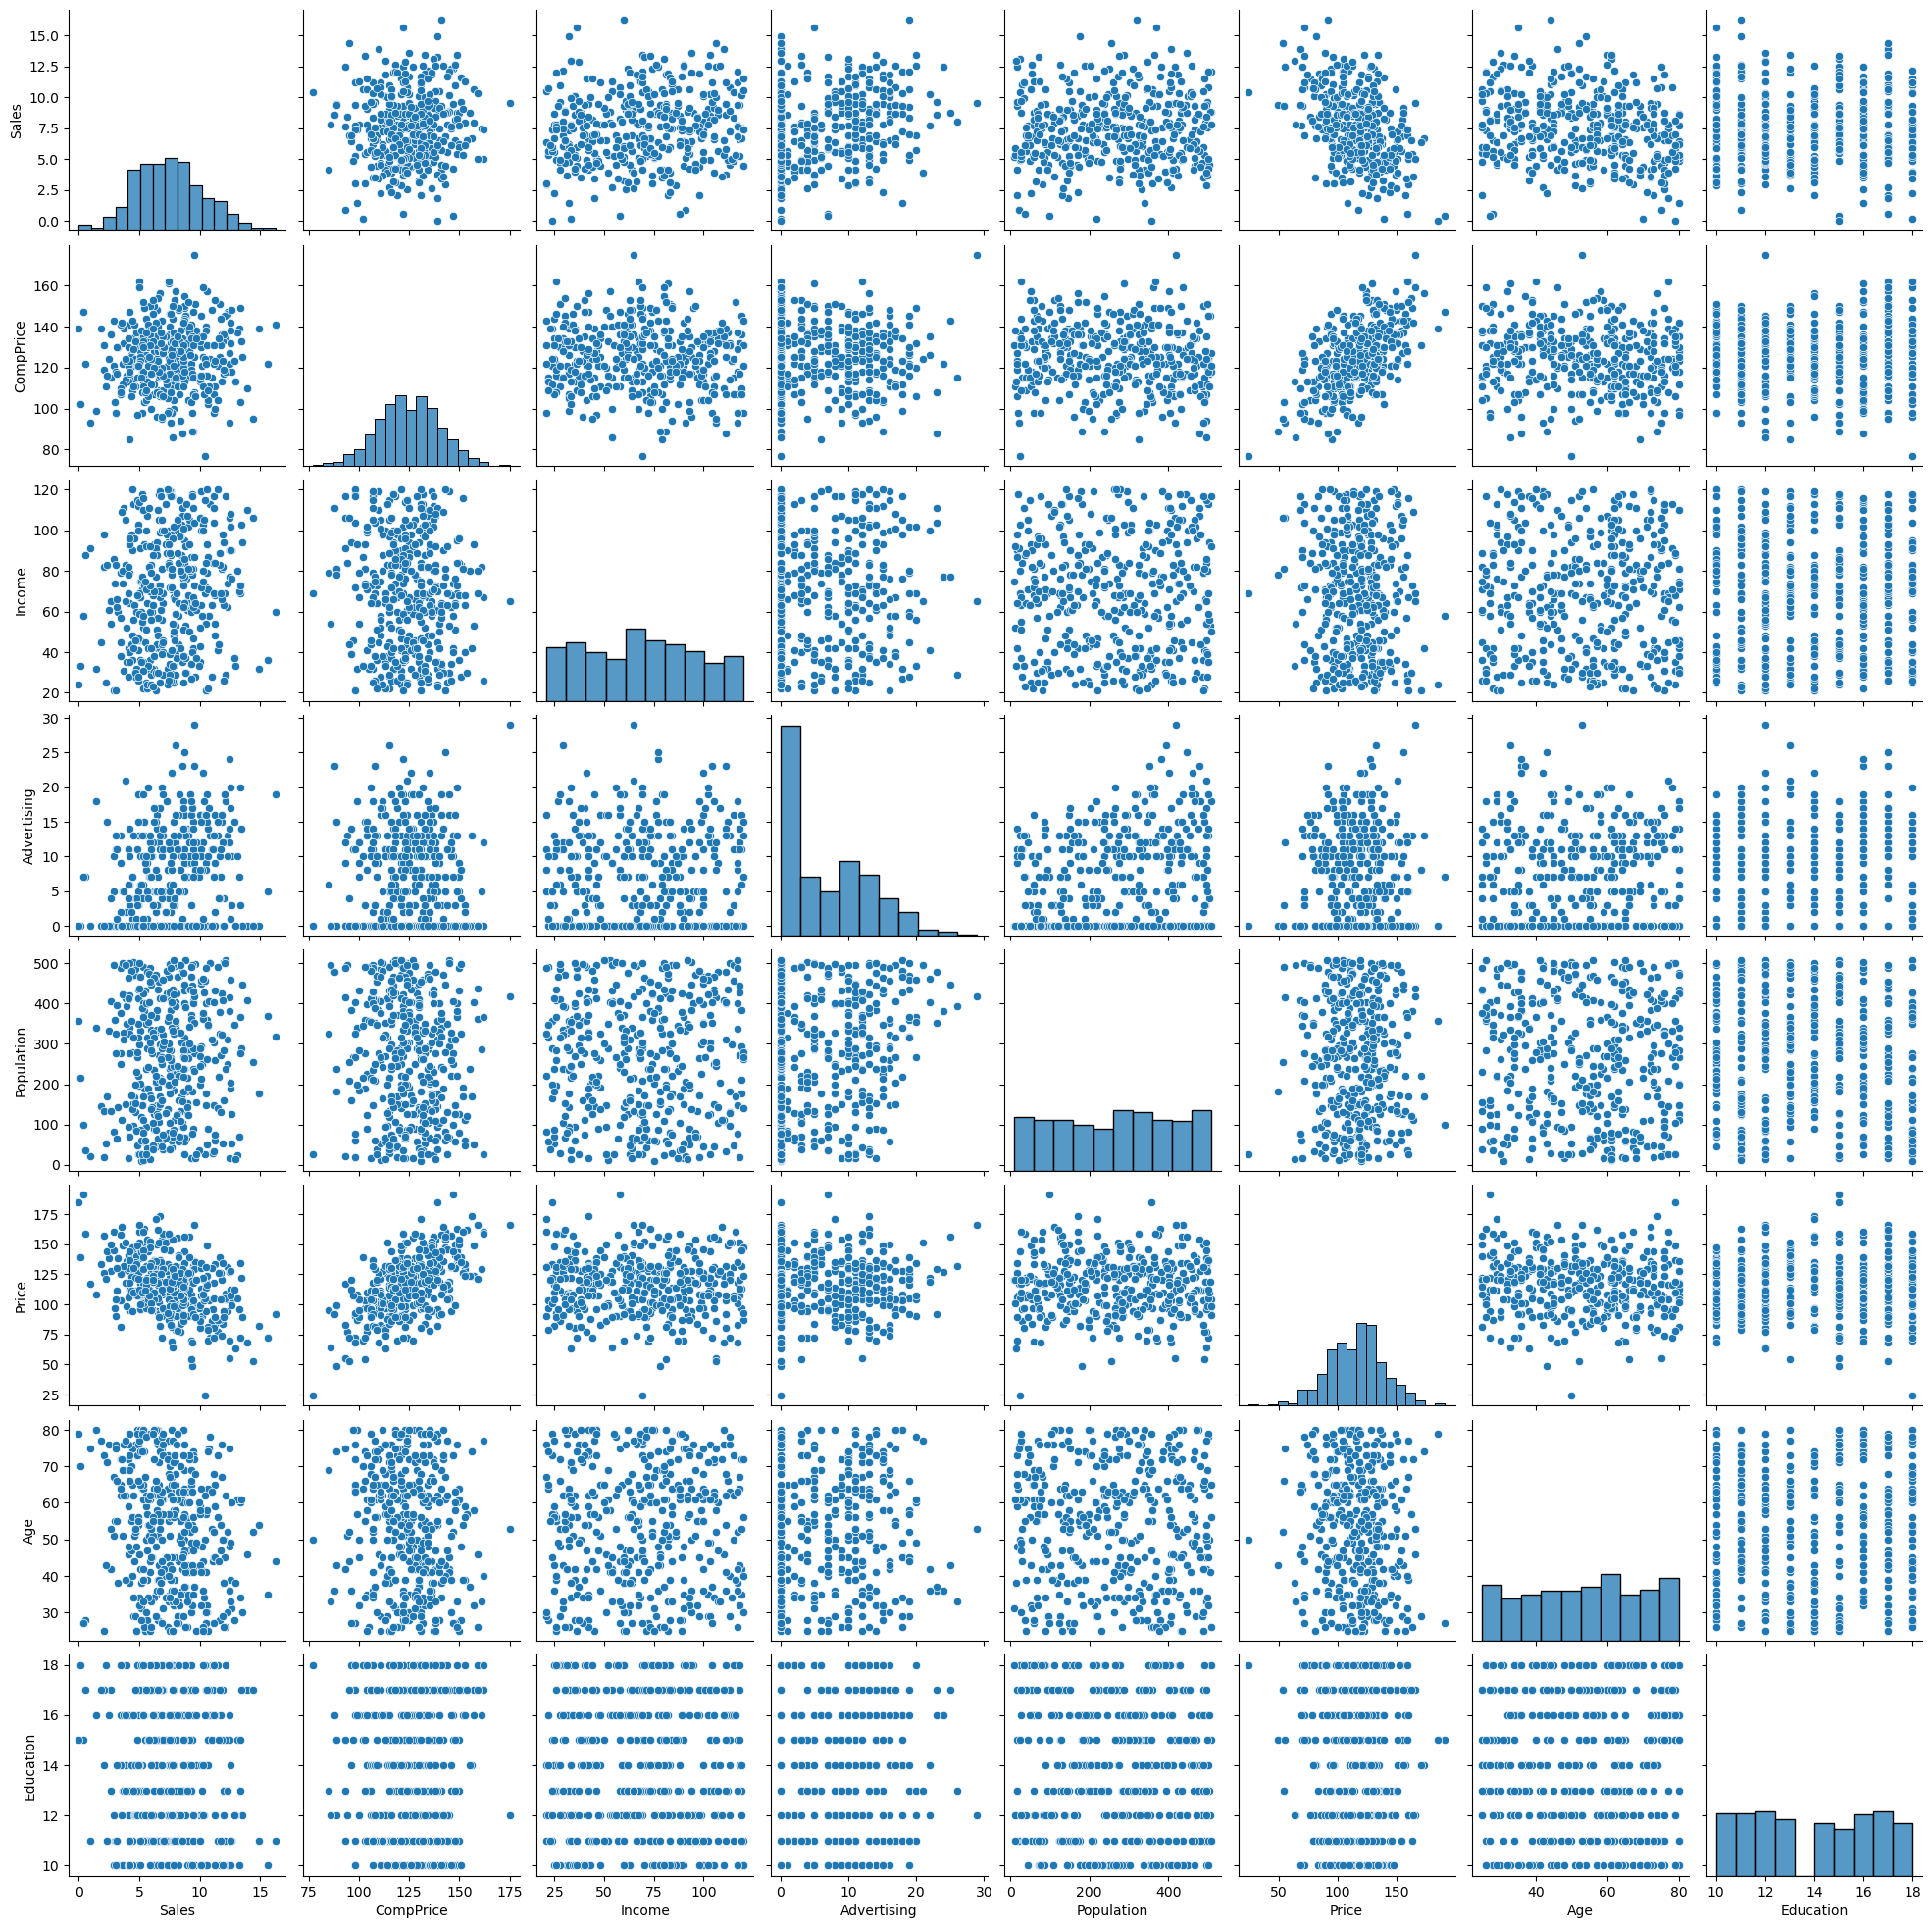

In [7]:
sns.pairplot(df)
plt.show()

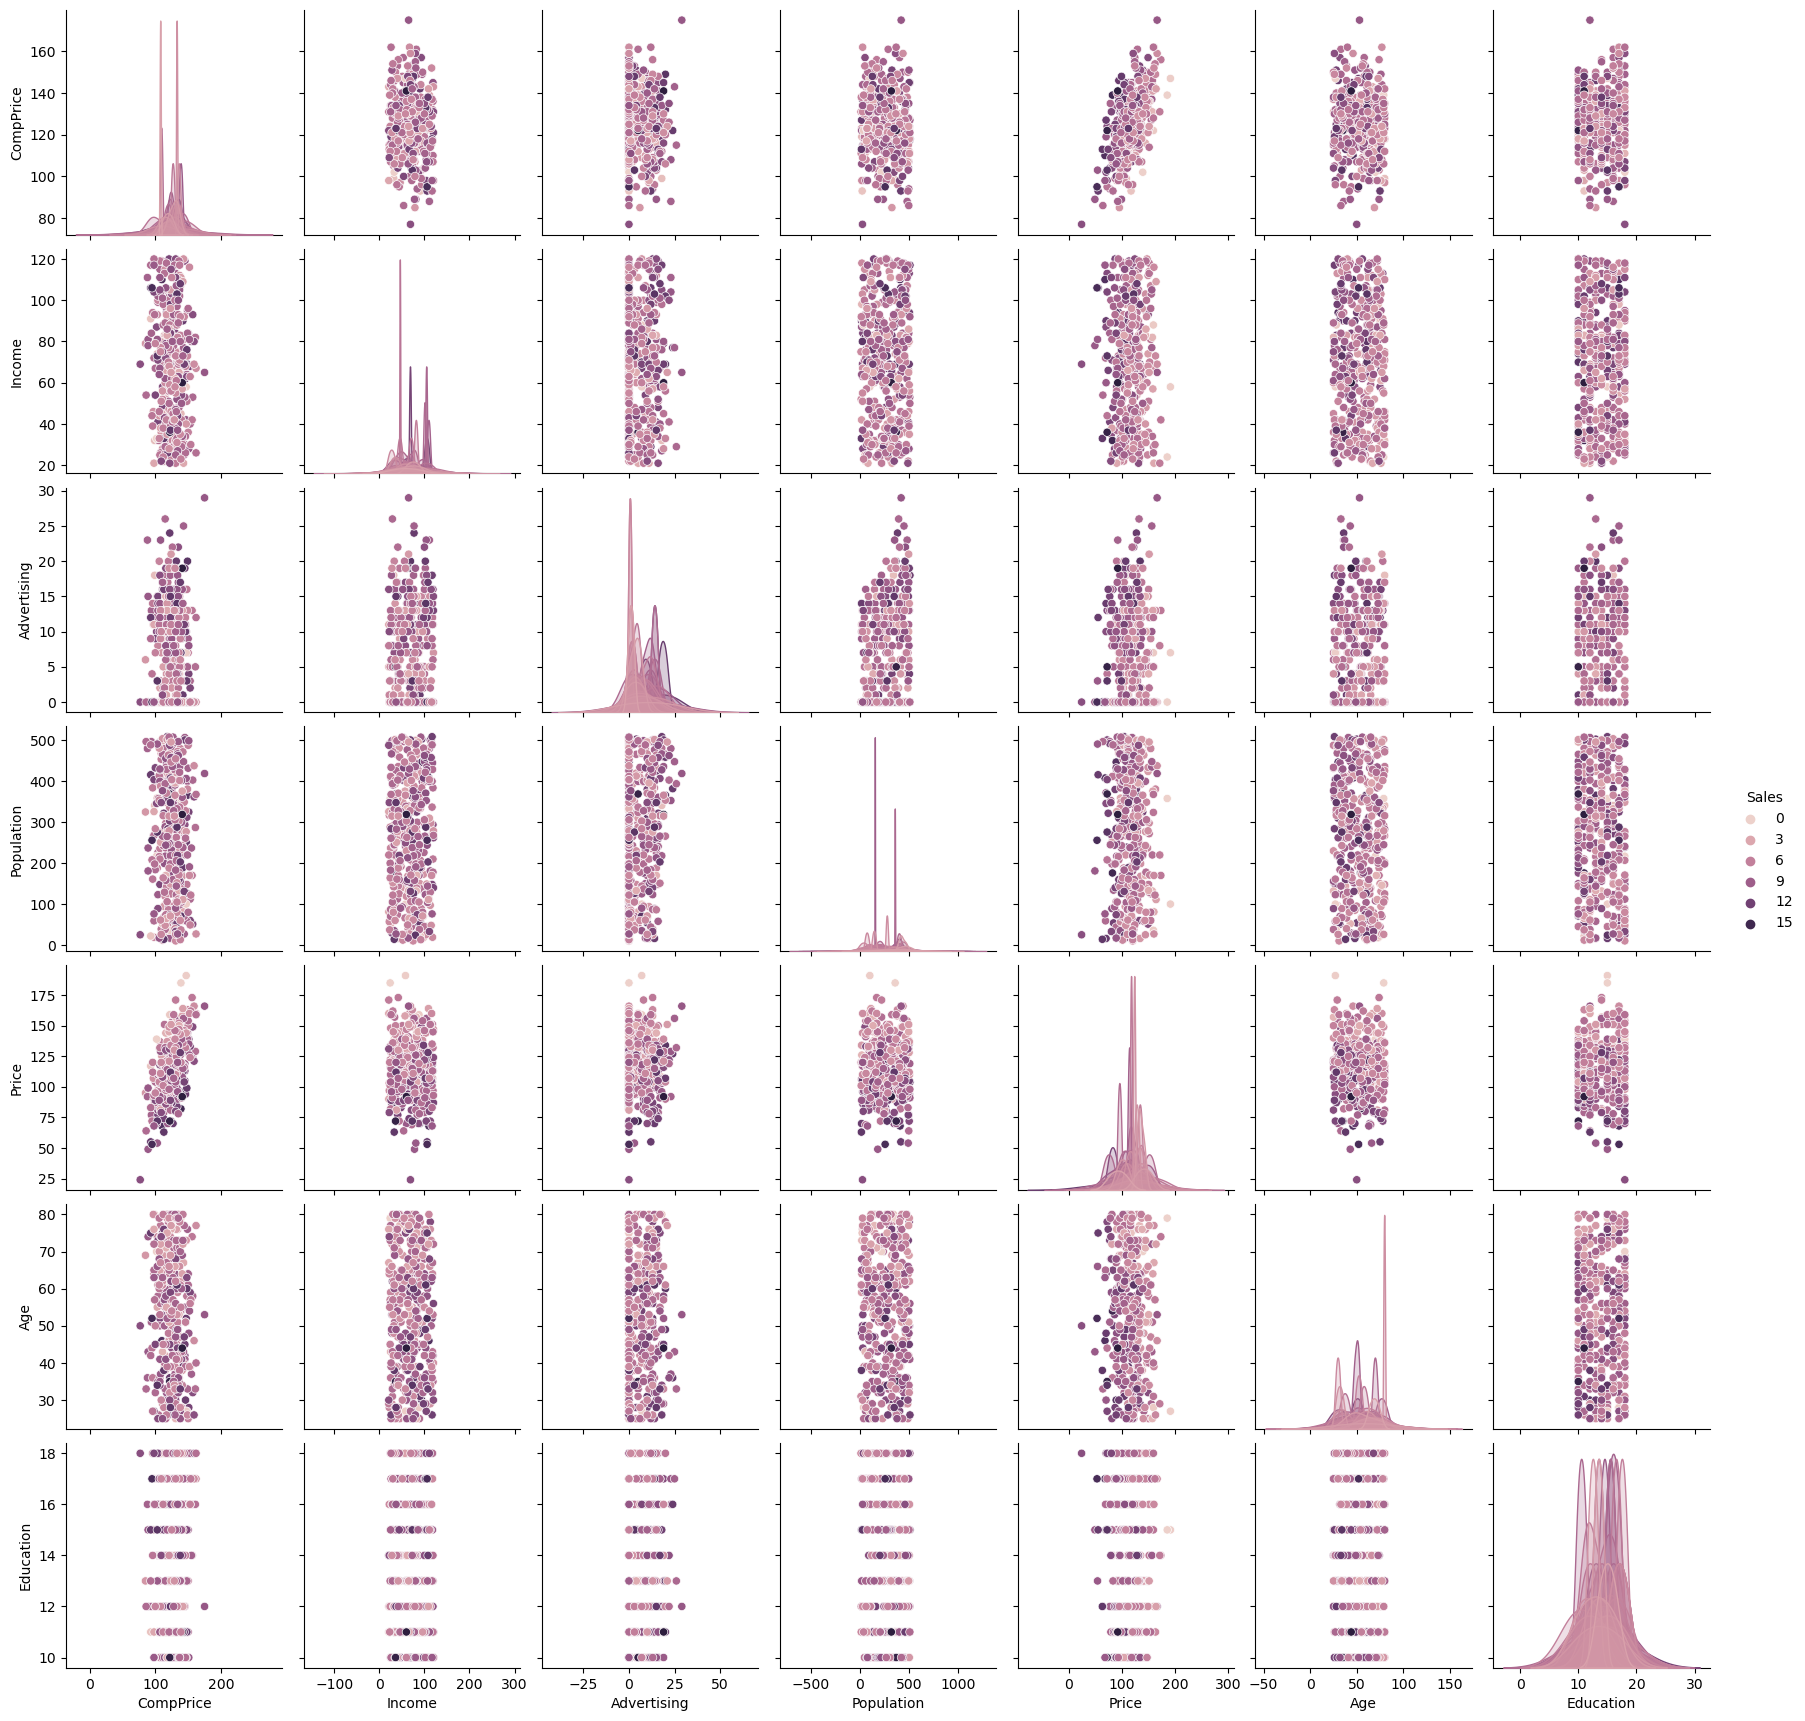

In [8]:
sns.pairplot(data= df, hue = 'Sales')
plt.show()

In [9]:
# Change all Categorical data to Numeric Data
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
df["ShelveLoc"]=le.fit_transform(df["ShelveLoc"])
df["Urban"]=le.fit_transform(df["Urban"])
df["US"]=le.fit_transform(df["US"])
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban  US  
0         17      1   1  
1         10      1   1  
2         12      1   1  
3         14      1   1  
4         13      1   0

In [11]:
# Split the Data
x=df.iloc[:,2:]
y=df.iloc[:,1]
x.head()

Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  \
0      73           11         276    120          0   42         17      1   
1      48           16         260     83          1   65         10      1   
2      35           10         269     80          2   59         12      1   
3     100            4         466     97          2   55         14      1   
4      64            3         340    128          0   38         13      1   

   US  
0   1  
1   1  
2   1  
3   1  
4   0

In [12]:
y.head()

0    138
1    111
2    113
3    117
4    141
Name: CompPrice, dtype: int64

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
kfold=KFold(n_splits=5,random_state=42,shuffle=True)
model=RandomForestClassifier(n_estimators=200,max_depth=5,min_samples_leaf=5,max_features='sqrt')
results=cross_val_score(model,x,y,cv=kfold)
print(results)

[0.0375 0.0375 0.0375 0.05   0.05  ]


In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
params={
    'max_depth':[2,3,5,'None'],
    'min_samples_leaf':[5,10,20],
    'n_estimators':[50,100,200,250]
}
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=2,scoring="accuracy")
grid_search.fit(x,y)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 'None'],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy', verbose=2)

In [17]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 3, 'min_samples_leaf': 10, 'n_estimators': 100}
0.0525


In [18]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

In [19]:
model.fit(x,y)
model.feature_importances_

array([0.16432426, 0.10975501, 0.17241255, 0.2063761 , 0.04971326,
       0.16492975, 0.08606177, 0.0245561 , 0.0218712 ])

### ADA Boost

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
kfold=KFold(n_splits=10,random_state=42,shuffle=True)
model=AdaBoostClassifier(n_estimators=5,random_state=42)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.017499999999999998


In [22]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
kfold=KFold(n_splits=10,random_state=42,shuffle=True)
estimators=[]
model1=LogisticRegression(max_iter=20)
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('decision_tree',model2))
model3=SVC()
estimators.append(('svm',model3))

### Voting Classifier

In [24]:
ensemble = VotingClassifier(estimators)
results_voting = cross_val_score(ensemble, x, y, cv=kfold)
results_voting

array([0.025, 0.075, 0.025, 0.025, 0.05 , 0.   , 0.025, 0.025, 0.075,
       0.025])

### Stacking Classifier

In [25]:
stack = StackingClassifier(estimators)
results_stacking = cross_val_score(stack, x, y, cv=kfold)
results_stacking

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

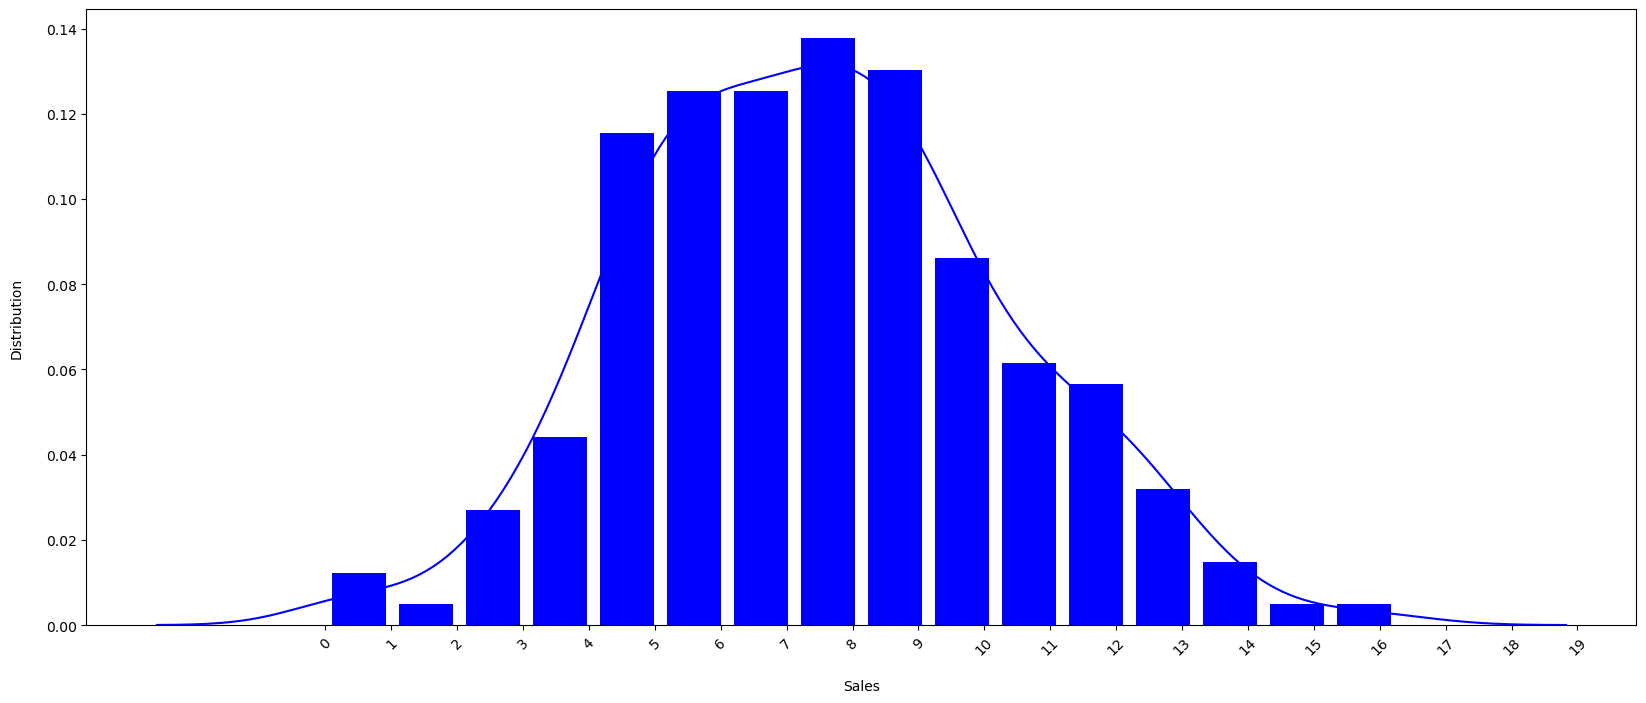

In [27]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Sales")

# Fraud Data

In [28]:
df=pd.read_csv("Fraud_check.csv")
df.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [30]:
df['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [31]:
(df['Taxable.Income']<=30000).value_counts()

Taxable.Income
False    476
True     124
Name: count, dtype: int64

In [32]:
le=LabelEncoder()
df["Undergrad"]=le.fit_transform(df["Undergrad"])
df["Urban"]=le.fit_transform(df["Urban"])
df["Marital.Status"]=le.fit_transform(df["Marital.Status"])
df.head()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   Work.Experience  Urban  
0               10      1  
1               18      1  
2               30      1  
3               15      1  
4               28      0

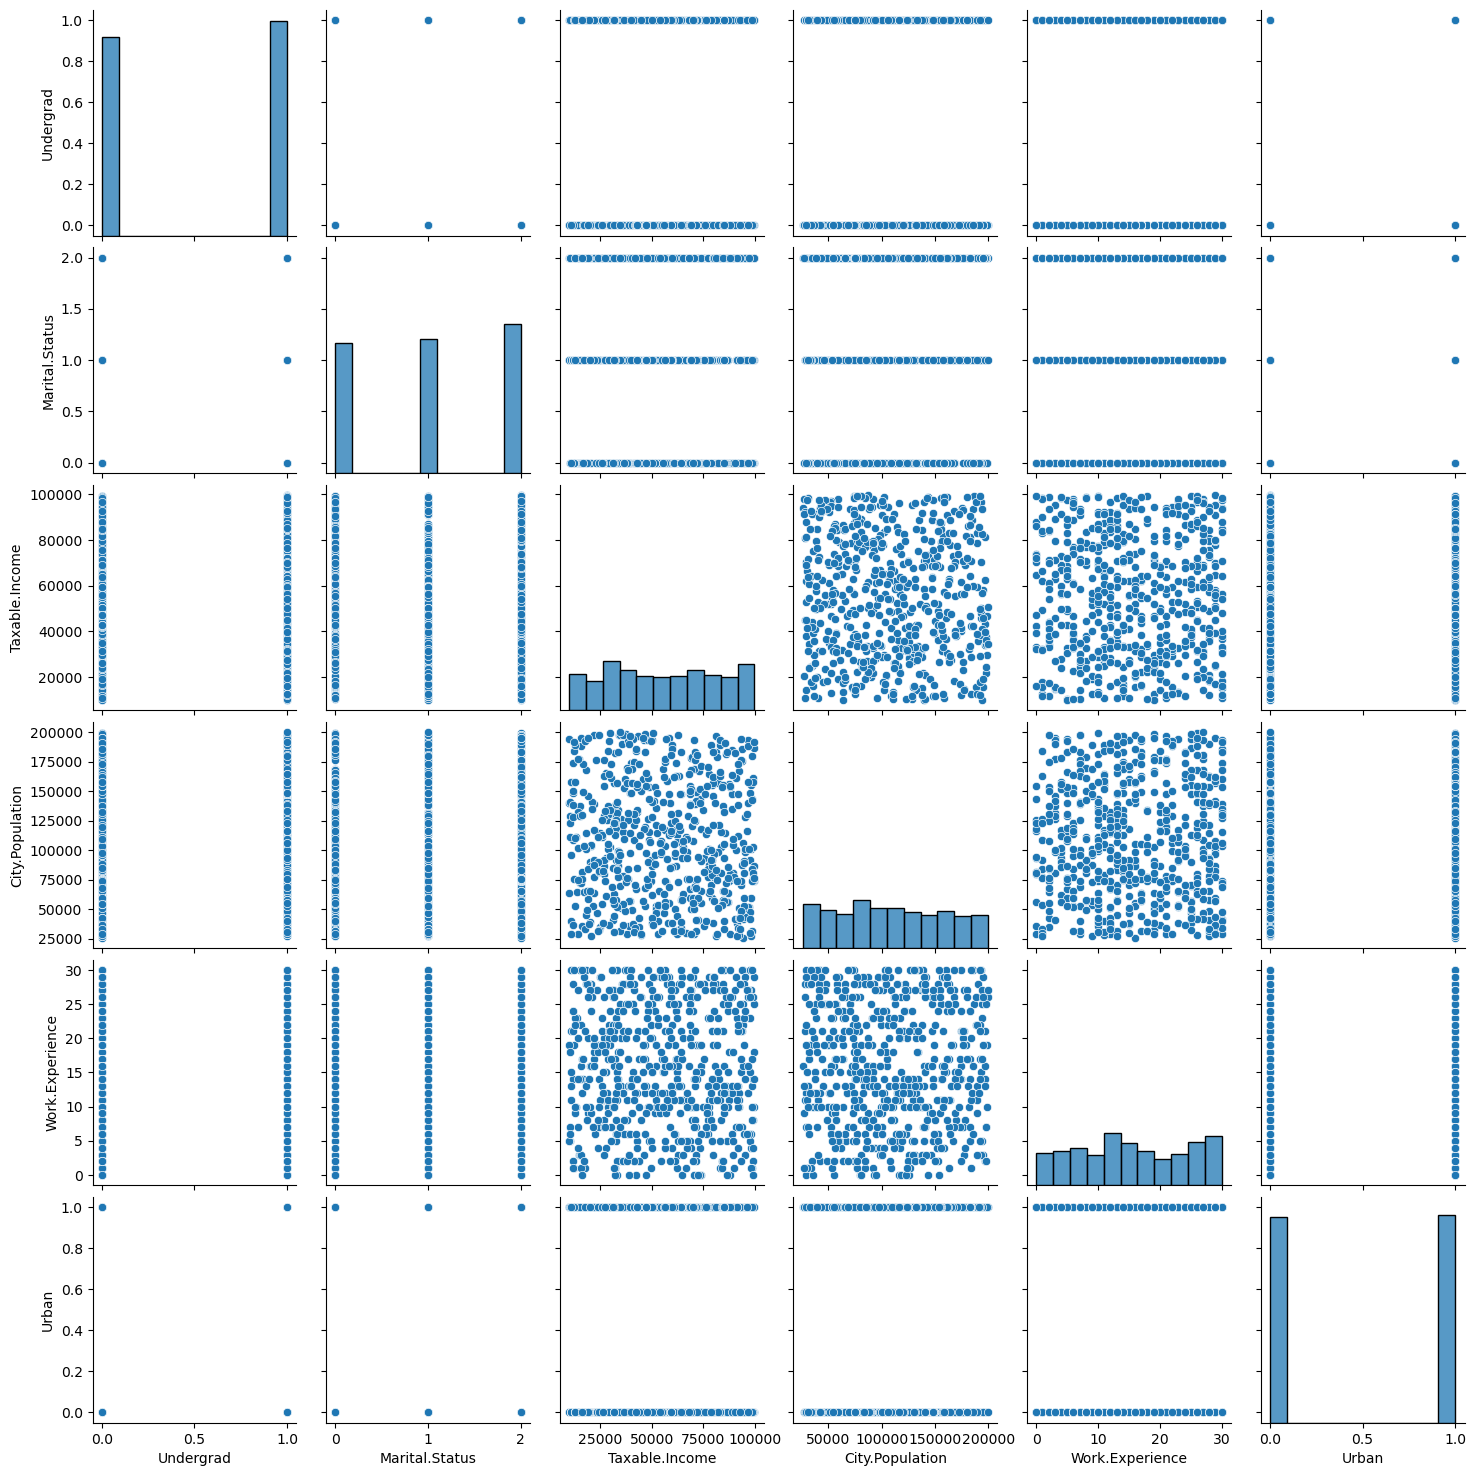

In [33]:
sns.pairplot(df)
plt.show()

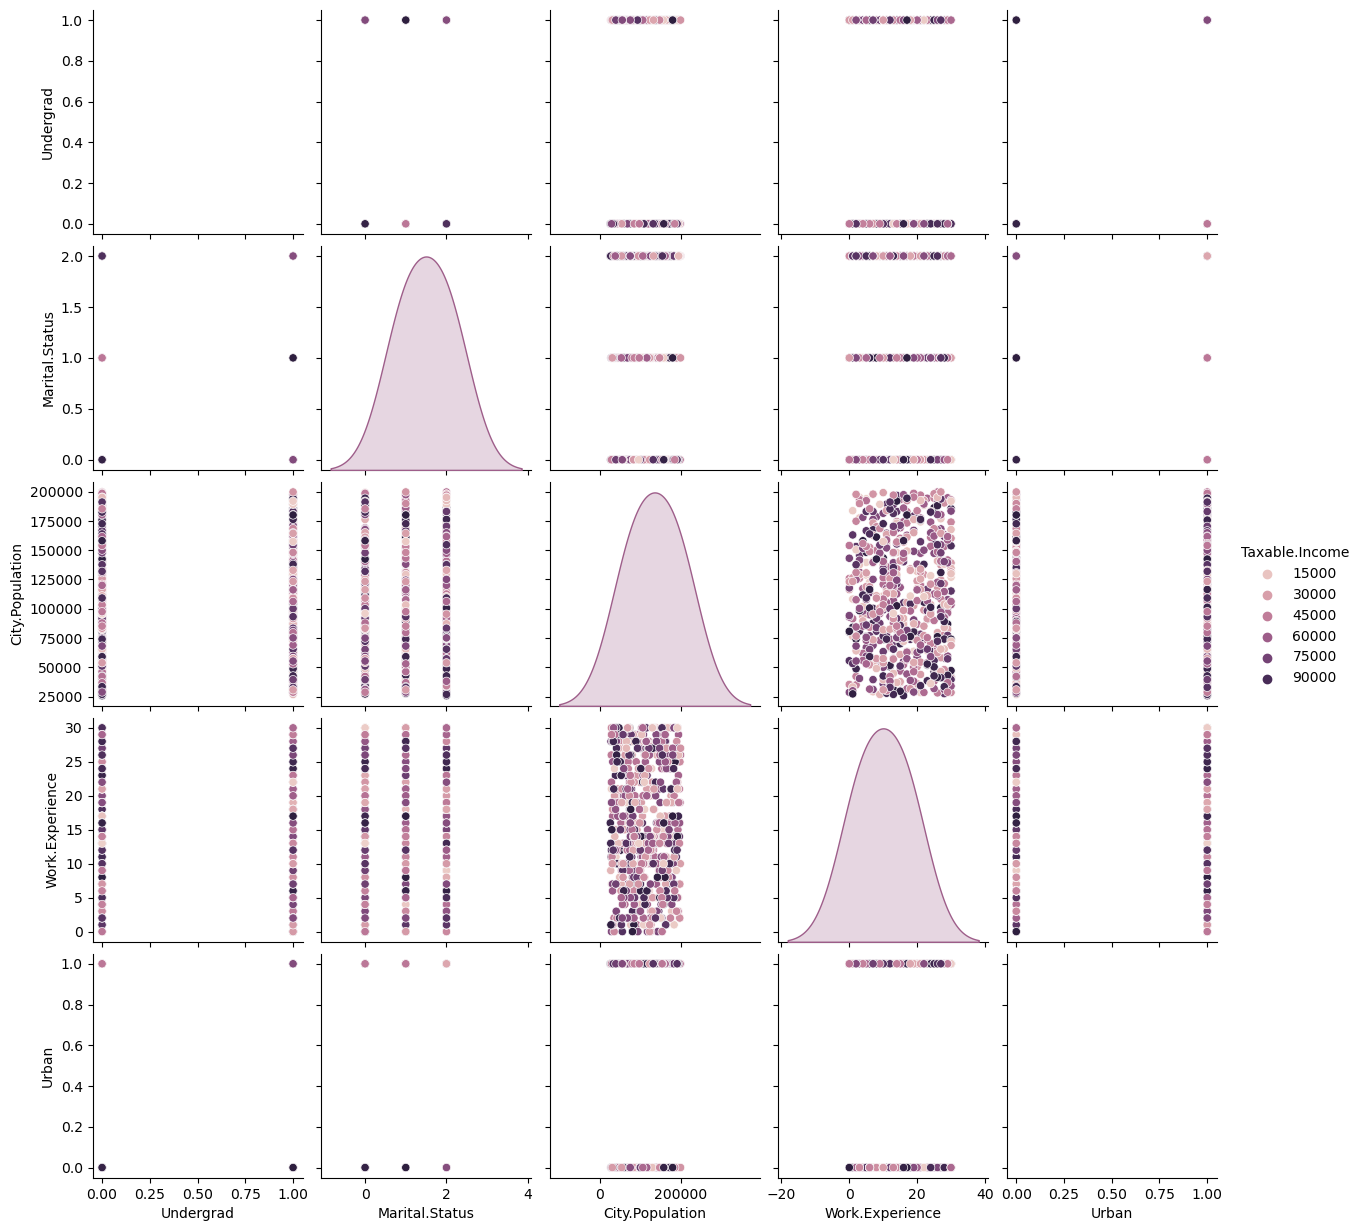

In [34]:
sns.pairplot(data= df, hue = 'Taxable.Income')
plt.show()

In [35]:
# Split the Data
X=df.iloc[:,[0,1,3,4,5]]
Y=df.iloc[:,2]
Y.head()

0    68833
1    33700
2    36925
3    50190
4    81002
Name: Taxable.Income, dtype: int64

In [36]:
kfold=KFold(n_splits=3,random_state=42,shuffle=True)
model=RandomForestClassifier(n_estimators=200,max_depth=4,min_samples_leaf=3,max_features='sqrt')
results=cross_val_score(model,X,Y,cv=kfold)
print(results)

[0. 0. 0.]


In [37]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
params={
    'max_depth':[2,3,5,'None'],
    'min_samples_leaf':[5,10,20],
    'n_estimators':[50,100,200,250]
}
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=2,n_jobs=-1,verbose=2,scoring="accuracy")
grid_search.fit(X,Y)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 'None'],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 250]},
             scoring='accuracy', verbose=2)

In [38]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 50}
0.0


In [39]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [40]:
model.fit(X,Y)
model.feature_importances_

array([0.07734345, 0.13497715, 0.40972898, 0.2912447 , 0.08670572])

### ADA Boost

In [41]:
kfold=KFold(n_splits=3,random_state=42,shuffle=True)
model=AdaBoostClassifier(n_estimators=3,random_state=42)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.0


In [42]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
kfold=KFold(n_splits=3,random_state=42,shuffle=True)
estimators1=[]
model1=LogisticRegression(max_iter=20)
estimators1.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators1.append(('decision_tree',model2))
model3=SVC()
estimators1.append(('svm',model3))

### Voting Classifier

In [44]:
# create the ensemble model
ensemble1 = VotingClassifier(estimators1)
results_voting = cross_val_score(ensemble1, X, Y, cv=kfold)
results_voting

array([0., 0., 0.])

In [45]:
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0          0               2           68833            50047   
1          1               0           33700           134075   
2          0               1           36925           160205   
3          1               2           50190           193264   
4          0               1           81002            27533   

   Work.Experience  Urban taxable_category  
0               10      1             Good  
1               18      1             Good  
2               30      1             Good  
3               15      1             Good  
4               28      0             Good

In [46]:
(df1['taxable_category']=='Good').value_counts()

taxable_category
True     476
False    124
Name: count, dtype: int64

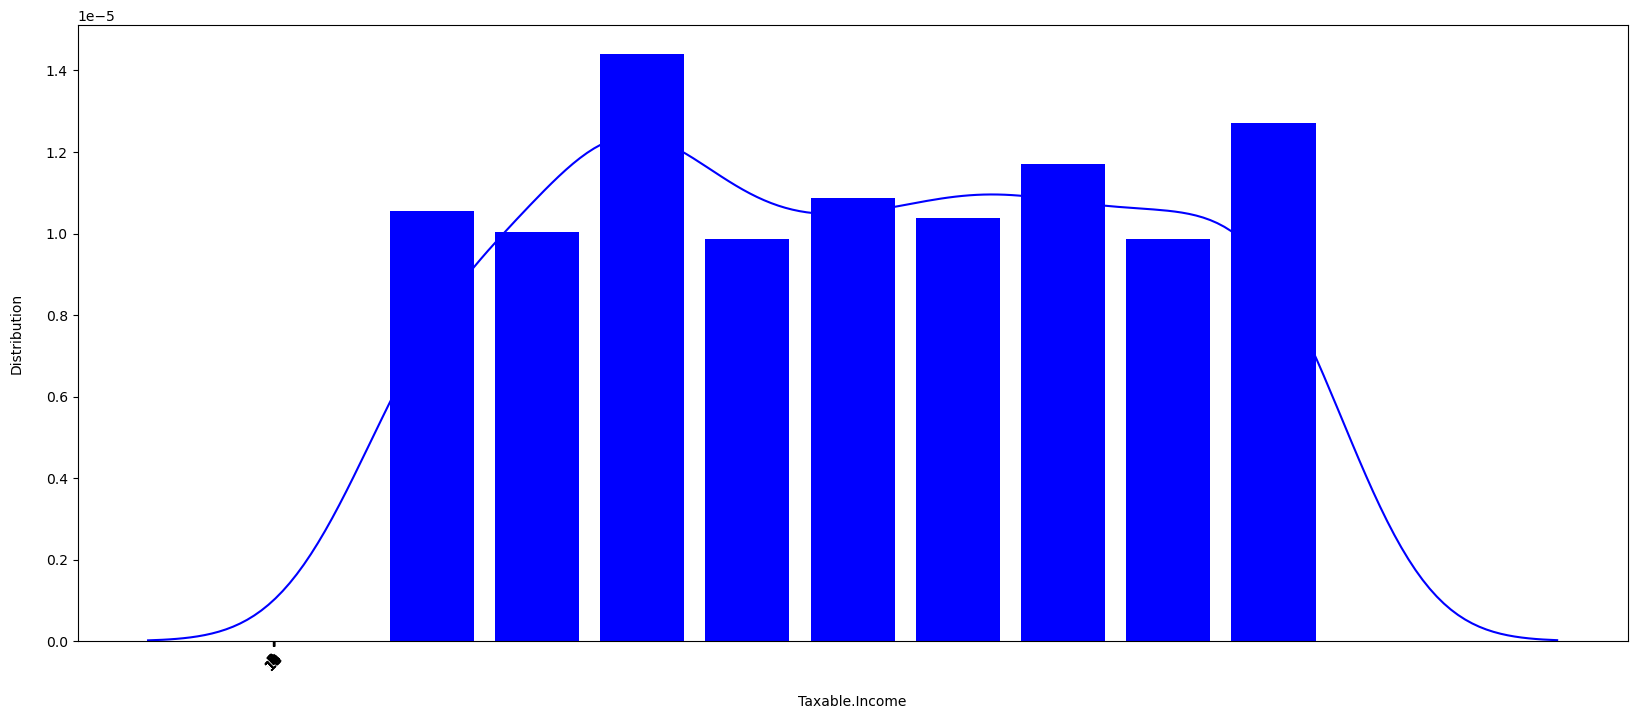

In [47]:
def distplot(param):
    plt.figure(figsize=(20,8))
    sns.distplot(df[param], color = "blue", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
distplot("Taxable.Income")